# Conjugate and Jeffreys Priors

## Example 1
We are launching a new marketing email campaign, the goal is to make people click on a link that routes them to our product page. We now want to figure out how probable (p) any given person is to click on the link.
The possible results are either 1 - click or 0 - no click. 

### Conjugate prior
    * The range of values (0, 1) perfectly matches the range of possible values for our probability p, either clicking or not clicking the link
    * The conjugate prior for the binomial likelihood is the **beta** distribution, which means the posterior distribution is also a beta distribution. This simplifies the calculation, as we can easily update the parameters with the number of successes (click) and failures (no click) from our data.
    * **Beta** distribution an can be very flexible. I.e. it can represent a uniform distribution for alpha = 1 and beta = 1 (no prior knowledge), or varying degrees of beliefs about the likelihood of click and no click: 
        * alpha = beta = 1 -> uniform
        * alpha > beta -> p is likely closer to 1 (click)
        * alpha < beta -> p is likely closer to 0 (no click)


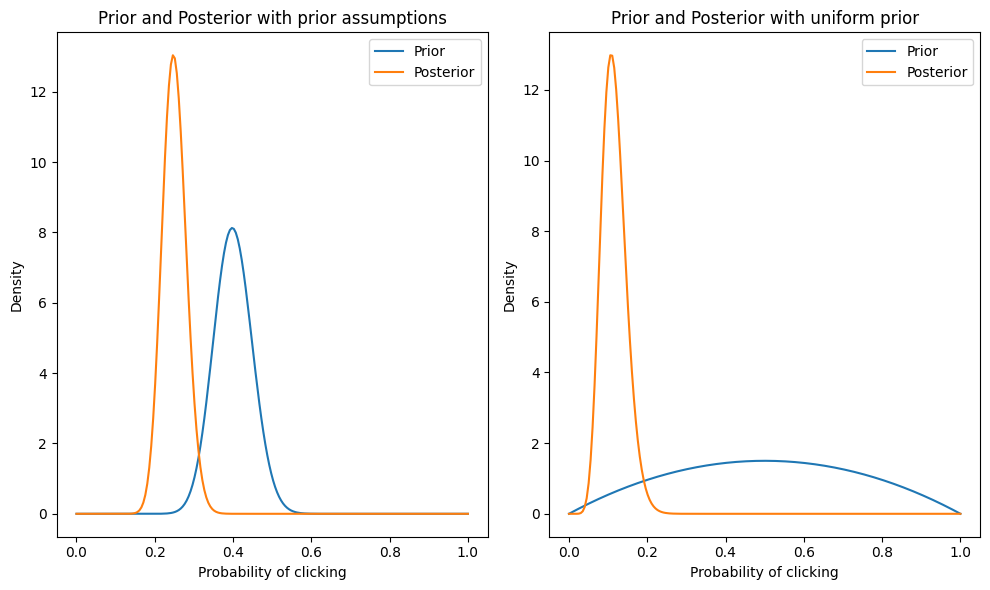

In [175]:
import numpy as np
from scipy.stats import beta, norm, poisson
import matplotlib.pyplot as plt

# Priors - We know from past experience that people are more likely not to click on a link in an email
alpha_prior = 40
beta_prior = 60

# Priors if we don't have any prior beliefs and want to start with a uniform distribution
alpha_uniform = 2
beta_uniform = 2

# Data - Our observed data is that 10 out of 100 people clicked on a link in an email
data = np.array([0] * 90 + [1]*10)
np.random.shuffle(data)

# Posterior
alpha_posterior = alpha_prior + sum(x == 1 for x in data)
beta_posterior = beta_prior + sum(x == 0 for x in data)

alpha_posterior_uniform = alpha_uniform + sum(x == 1 for x in data)
beta_posterior_uniform = beta_uniform + sum(x == 0 for x in data)

# Visualization
x = np.linspace(0, 1, 200)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot 1: Prior and Posterior with prior assumptions
ax1.plot(x, beta.pdf(x, alpha_prior, beta_prior), label='Prior')
ax1.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label='Posterior')
ax1.set_xlabel('Probability of clicking')
ax1.set_ylabel('Density')
ax1.set_title('Prior and Posterior with prior assumptions')
ax1.legend()

# Plot 2: Prior and Posterior with uniform prior
ax2.plot(x, beta.pdf(x, alpha_uniform, beta_uniform), label='Prior')
ax2.plot(x, beta.pdf(x, alpha_posterior_uniform, beta_posterior_uniform), label='Posterior')
ax2.set_xlabel('Probability of clicking')
ax2.set_ylabel('Density')
ax2.set_title('Prior and Posterior with uniform prior')
ax2.legend()

plt.tight_layout()
plt.show()

### Preliminary Results
It becomes clear that prior knwoledge has effect not only on the prior distribution, but also on the posterior if it is large enough and the dataset is sufficiently large. In our example we can observe, that the model based on prior knowledge is slightly more optimistic in the posterior ditributin for a customer to click on the link, as the model without any prior knowledge. 

To make some further observations on this topic let's look at the distributions based on a couple different values for alpha and beta: 

* alpha = 10 and beta = 50 -> Based on prior knowledeg people are unlikely to click on the link
* alpha = 0.5 and beta = 50 -> Based on prior knowledge people are highly unlikely to click on the link
* alpha = 50 and beta = 10 -> Based on prior knowledeg people are likely to click on the link
* alpha = 50 and beta = 0.5 -> Based on prior knowledge people are highly likely to click on the link

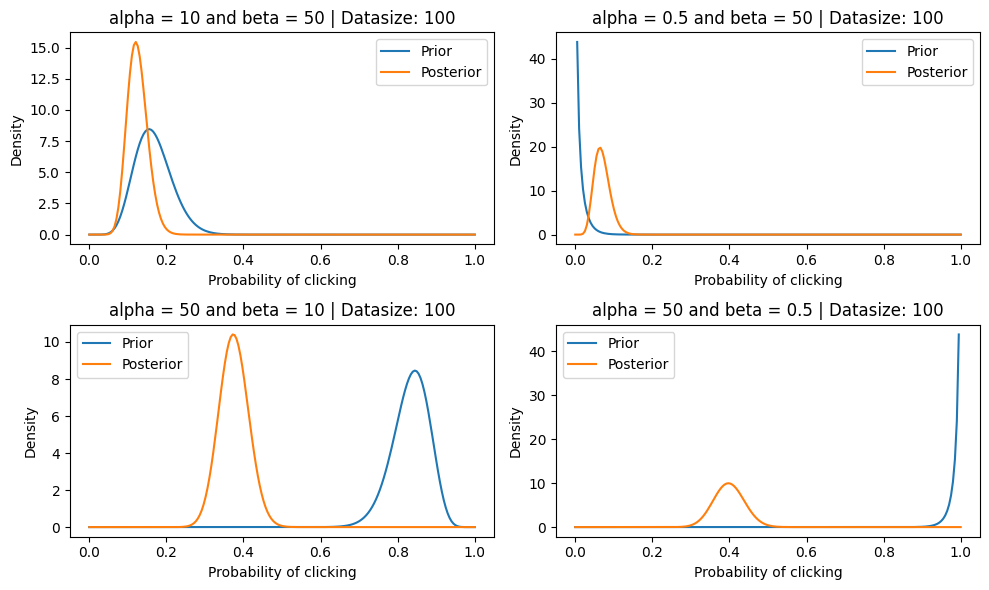

In [176]:
def calculate_and_plot(alpha_prior, beta_prior, data, ax):
    alpha_posterior = alpha_prior + sum(x == 1 for x in data)
    beta_posterior = beta_prior + sum(x == 0 for x in data)

    x = np.linspace(0, 1, 200)
    ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), label='Prior')
    ax.plot(x, beta.pdf(x, alpha_posterior, beta_posterior), label='Posterior')
    ax.set_xlabel('Probability of clicking')
    ax.set_ylabel('Density')
    ax.set_title('alpha = {} and beta = {} | Datasize: {}'.format(alpha_prior, beta_prior, len(data)))
    ax.legend()

def visualize_priors(priors, data):
    num_plots = len(priors)
    cols = 2
    rows = (num_plots // cols) + (num_plots % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(10,6))
    axes = axes.flatten()

    for i, (a, b) in enumerate(priors):
        calculate_and_plot(a, b, data, axes[i])

    if num_plots < rows * cols:
        for i in range(num_plots, rows * cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


priors = [(10, 50), (0.5, 50), (50, 10), (50, 0.5)]

visualize_priors(priors, data)



### Results part 2
We can observe that the choice of alpha and beta can have a severe impact on the posterior distribution. This means we need to choose our alpha and beta carefully, either by getting expert input or using prooven previously collected insights. 

### Implications, Limitations and Considerations
* data dominance: as we accumulate more data the impact of the prior diminishes.
* priors: we must make sure that the priors reflect genuine knowledge, not just a hunch. Otherwise, especially if the data is scarce it lead to false inferences.
* jeffreys prior: if we only have minimal prior information defaulting to jeffreys prior can be a good choice (we will examine this later in the notebook)
* sensitivity analysis: running the model with different combiniations of alpha and beta can reveal how sensitive the posterior is to our prior choices. 



## Jeffreys prior

In contrast to the conjugate prior the jeffreys prior aims to be non-informative. We used the alpha = beta = 2 case earlier for this case in a conjugate prior. The Jeffreys prior tries to minimize the influence of prior assumptions on the posterior distribution by design. 

### Beta distribution for Jeffreys prior
For the Beta distribution the Jeffreys prior is proportional to the square root of the determinant of the Fisher information matrix. This translates to a Beta distribution with alpha = 0.5 and beta = 0.5

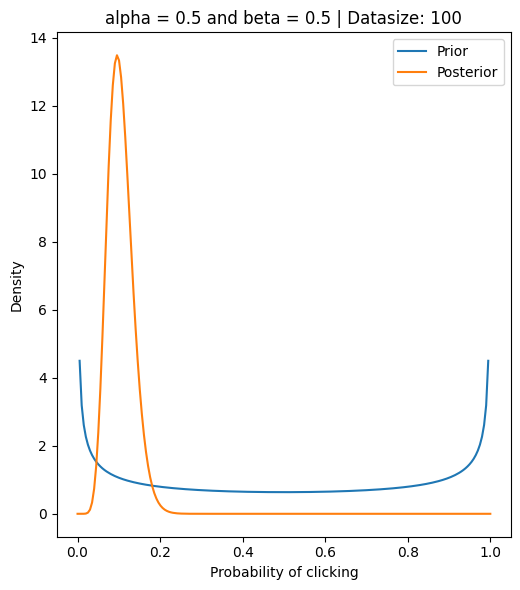

In [177]:
# Jeffreys prior
jeffreys_prior = [(0.5, 0.5)]

visualize_priors(jeffreys_prior, data)


### Result Jeffreys 
As we can see the prior distribution for a jeffreys prior largely favors eithe 0 or 1, but by passing data in the posterior function moves the highest probability to be slightly below 0.2


## What happens if we examine all priors but with varying datasets

### Priors
* alpha = 10 and beta = 50
* alpha = 50 and beta = 10
* alpha = 0.5 and beta = 0.5 (Jeffreys)

### Data sample sizes
10, 100, 1000, 10000

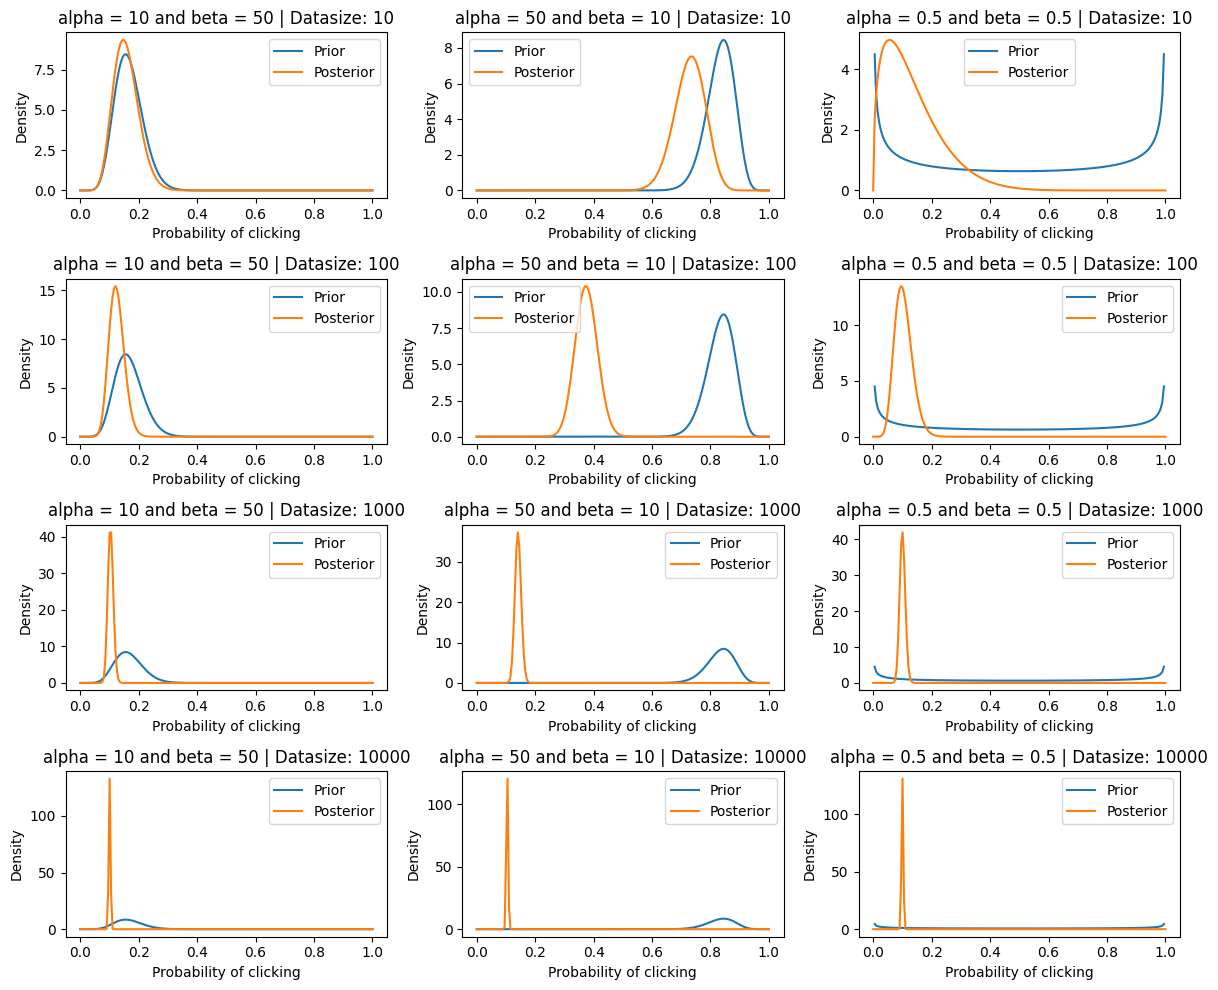

In [178]:
def generate_data(size):
    zeroes = size // 10 * 9
    ones = size - zeroes

    dataset = np.array([0] * zeroes + [1]*ones)
    np.random.shuffle(dataset)
    return dataset

def visualize_priors_datasizes(priors, data_sizes):
    num_priors = len(priors)
    num_sizes = len(data_sizes)
    cols = num_priors
    rows = num_sizes 
    fig, axes = plt.subplots(rows, cols, figsize=(12, 10)) 

    for i, (alpha, beta) in enumerate(priors): 
        for j, size in enumerate(data_sizes):
            data = generate_data(size)
            calculate_and_plot(alpha, beta, data, axes[j, i])

    plt.tight_layout()
    plt.show()

priors_datasizes = [(10, 50), (50, 10), (0.5, 0.5)]
datasizes = [10, 100, 1000, 10000]

visualize_priors_datasizes(priors_datasizes, datasizes)


We can observer thatno matter the prior we use if the dataset is large enough the posterior function converges.
One interesting observation is that the jefferys prior always has a good sense of the correct direction of the distribution. This once again highlights that if we do not have good prior knowledge we should refrain from setting values for alpha and beta and instead use jeffreys prior. 
If we would have chosen a higher alpha than beta value in this case and our dataset was relativly small we would get much worse results (in this case too positive) for the probability function. 

## A deeper look at jeffreys prior

### Core idea:
* non informative -> no strong prior knowledge or assumptions about the distribution we are trying to model
* Fisher information -> key principle behind the calculation

### Fisher Information
* measuers how much information a distribution carries about its own parameters
* a higher amount of Fisher information implies that the data will be more informative in determining the true value of the parameter(s) of interest

### Calculation
1. Likelihood function -> Function that describes the probability of observing our data
2. Calculate the Fisher information matrix -> Can be a single value or a matrix, depending on the number of paramters in the model
3. Jeffreys Prior: Is proportional to the square root of the determinant of the Fisher Information matrix. The prior should place more weight on regions where the data provides more information.


Binomial Distribution:
* Likelihood function: P(X=k) = (n choose k) * p^k * (1-p)^(n-k)
* Fisher Information: n / (p * (1-p))
* Jeffreys Prior: Beta(0.5, 0.5)
* Example: Click on an email campaign

Exponential Distribution:
* Likelihood function: L(λ|data) = λ^n * exp(-λ * Σx_i) 
* Fisher Information: 1 / λ^2
* Jeffreys Prior: 1/√λ (improper prior)
* Example: Time between customer purchases

Normal Distribution (known variance):
* Likelihood function: f(x; μ) = (1/√(2πσ^2)) * exp(-(x-μ)^2 / (2σ^2) )
* Fisher Information: 1 / σ^2
* Jeffreys Prior: Uniform (flat, improper prior)
* Example: Average height of Oak Trees

Poisson Distribution:
* Likelihood function: P(X=k) = (e^-λ * λ^k) / k!
* Fisher Information: 1/ λ
* Jeffreys Prior: 1/√λ (improper prior)
* Example: Website traffic errors per hour		

Links:
https://www.stats.ox.ac.uk/~reinert/stattheory/theorypart22008.pdf

## Poisson example 
People arriving in a shoe store over a given time

The probability distribution (conjugate prior) for a poisson liklihood function is a gamma distribution. 

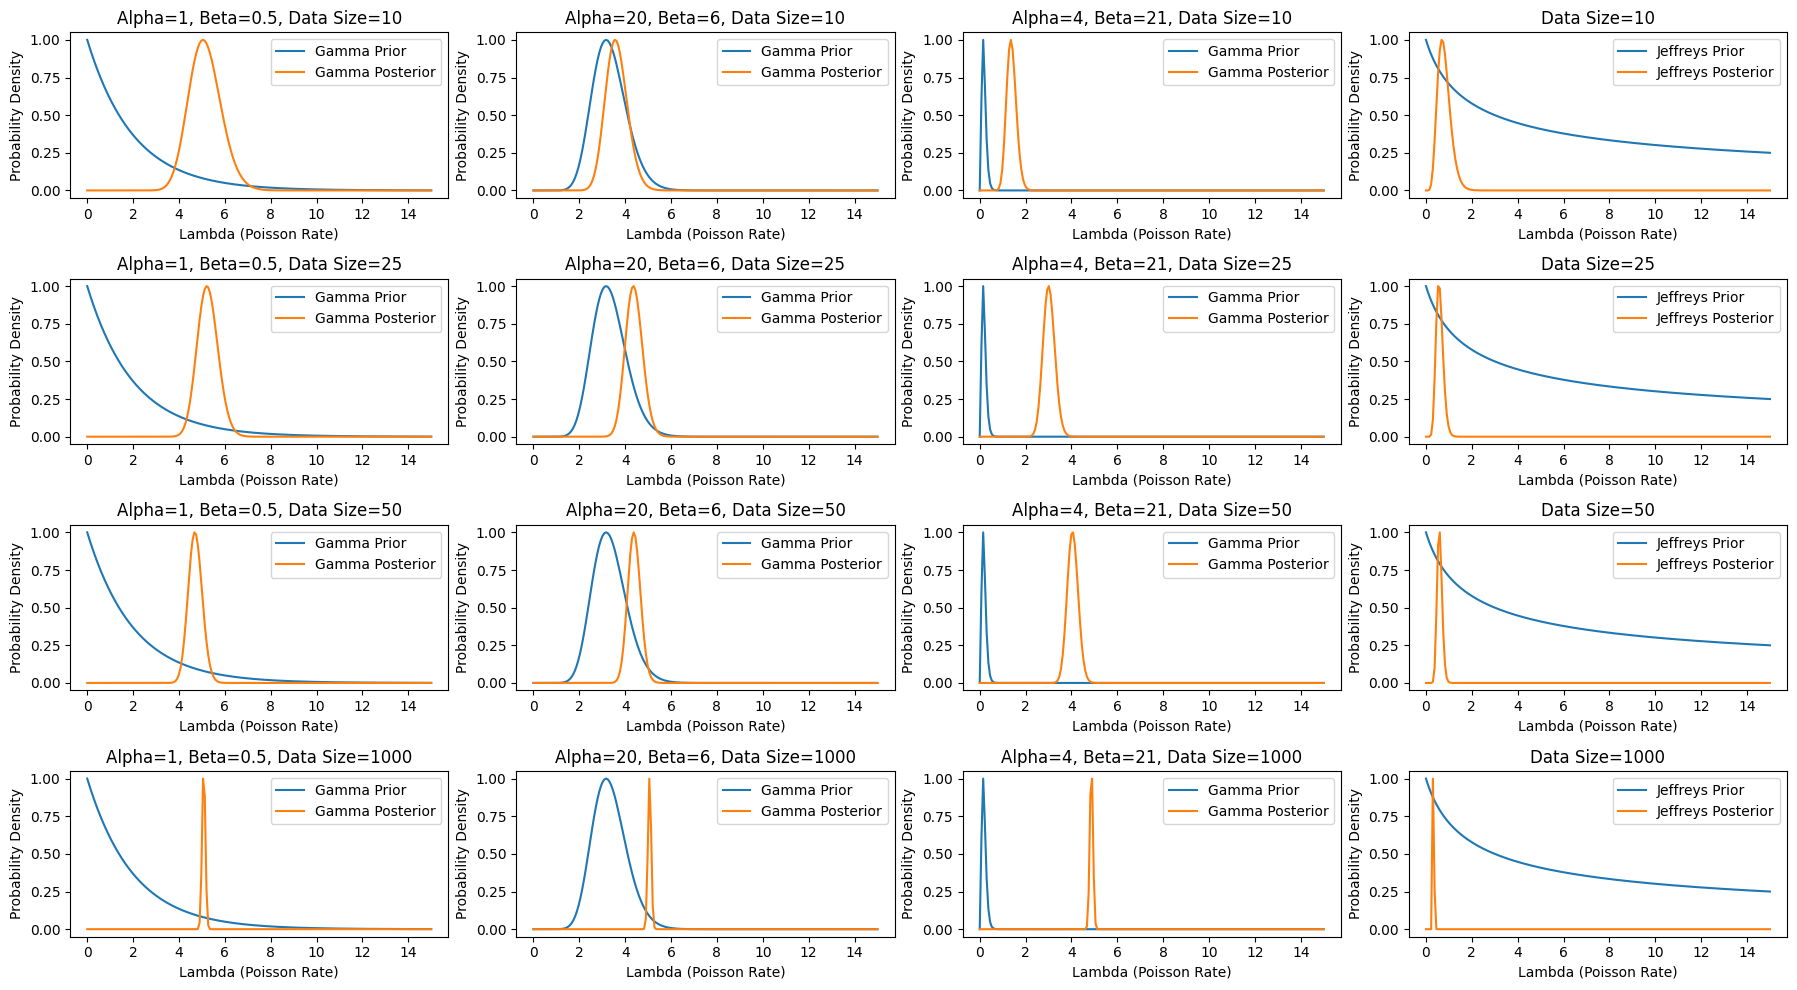

In [239]:
from scipy.stats import gamma, poisson

# Parameters to explore
alpha_values = [1, 20, 4]
beta_values = [0.5, 6, 21]
data_sizes = [10, 25, 50, 1000]

# True Poisson rate (for simulation)
true_lambda = 5

# Range for plotting the distributions
lambda_range = np.linspace(0, 15, 200)

# Figure and subplot setup
num_cols = len(alpha_values) + 1  # Account for Jeffreys prior column
fig, axes = plt.subplots(len(data_sizes), num_cols, figsize=(18, 10))  

# Nested loops for parameter combinations and data sizes
for i, data_size in enumerate(data_sizes):
    for j, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
        ax = axes[i, j]

        # Data Simulation
        data = np.random.poisson(lam=true_lambda, size=data_size)

        # Gamma Prior 
        prior_pdf = gamma.pdf(lambda_range, a=alpha, scale=1 / beta)
        prior_pdf /= prior_pdf.max()  
        ax.plot(lambda_range, prior_pdf, label='Gamma Prior')

        # Gamma Posterior 
        posterior_alpha = alpha + np.sum(data)
        posterior_beta = beta + data_size
        posterior_pdf = gamma.pdf(lambda_range, a=posterior_alpha, scale=1 / posterior_beta)
        posterior_pdf /= posterior_pdf.max() 
        ax.plot(lambda_range, posterior_pdf, label='Gamma Posterior')

        ax.set_xlabel('Lambda (Poisson Rate)')
        ax.set_ylabel('Probability Density')
        ax.set_title(f'Alpha={alpha}, Beta={beta}, Data Size={data_size}')
        ax.legend()

    # Scaling the data (if necessary)
    scaled_data = data / data.max() 

    # Jeffreys prior and posterior (last column)
    ax = axes[i, -1]  
    jeffreys_prior = 1/np.sqrt(lambda_range + 1)  
    jeffreys_prior /= jeffreys_prior.max() 
  
    ax.plot(lambda_range, jeffreys_prior, label='Jeffreys Prior')

    # Numerical calculation of posterior with Jeffreys prior
    log_likelihood = np.sum(scaled_data) * np.log(np.maximum(lambda_range, 1e-10)) - data_size * lambda_range
    likelihood = np.exp(log_likelihood)  
    posterior_jeffreys = likelihood * np.sqrt(lambda_range) 

    if np.all(np.isfinite(posterior_jeffreys)) and np.any(posterior_jeffreys):  
        posterior_jeffreys /= posterior_jeffreys.max()  
    else:
        print("Warning: Posterior contains zero, NaN, or infinite values")

    ax.plot(lambda_range, posterior_jeffreys, label='Jeffreys Posterior') 
    ax.set_xlabel('Lambda (Poisson Rate)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Data Size={data_size}')  
    ax.legend()

plt.tight_layout()  
plt.show()
        



## Exponential Example


/var/folders/nx/scf6msw549j5lvz4kv2gfpz00000gn/T/ipykernel_52430/1699370729.py:48: RuntimeWarning: divide by zero encountered in divide
  jeffreys_prior = 1/ np.sqrt(lambda_range)
/var/folders/nx/scf6msw549j5lvz4kv2gfpz00000gn/T/ipykernel_52430/1699370729.py:49: RuntimeWarning: invalid value encountered in divide
  jeffreys_prior /= jeffreys_prior.max()


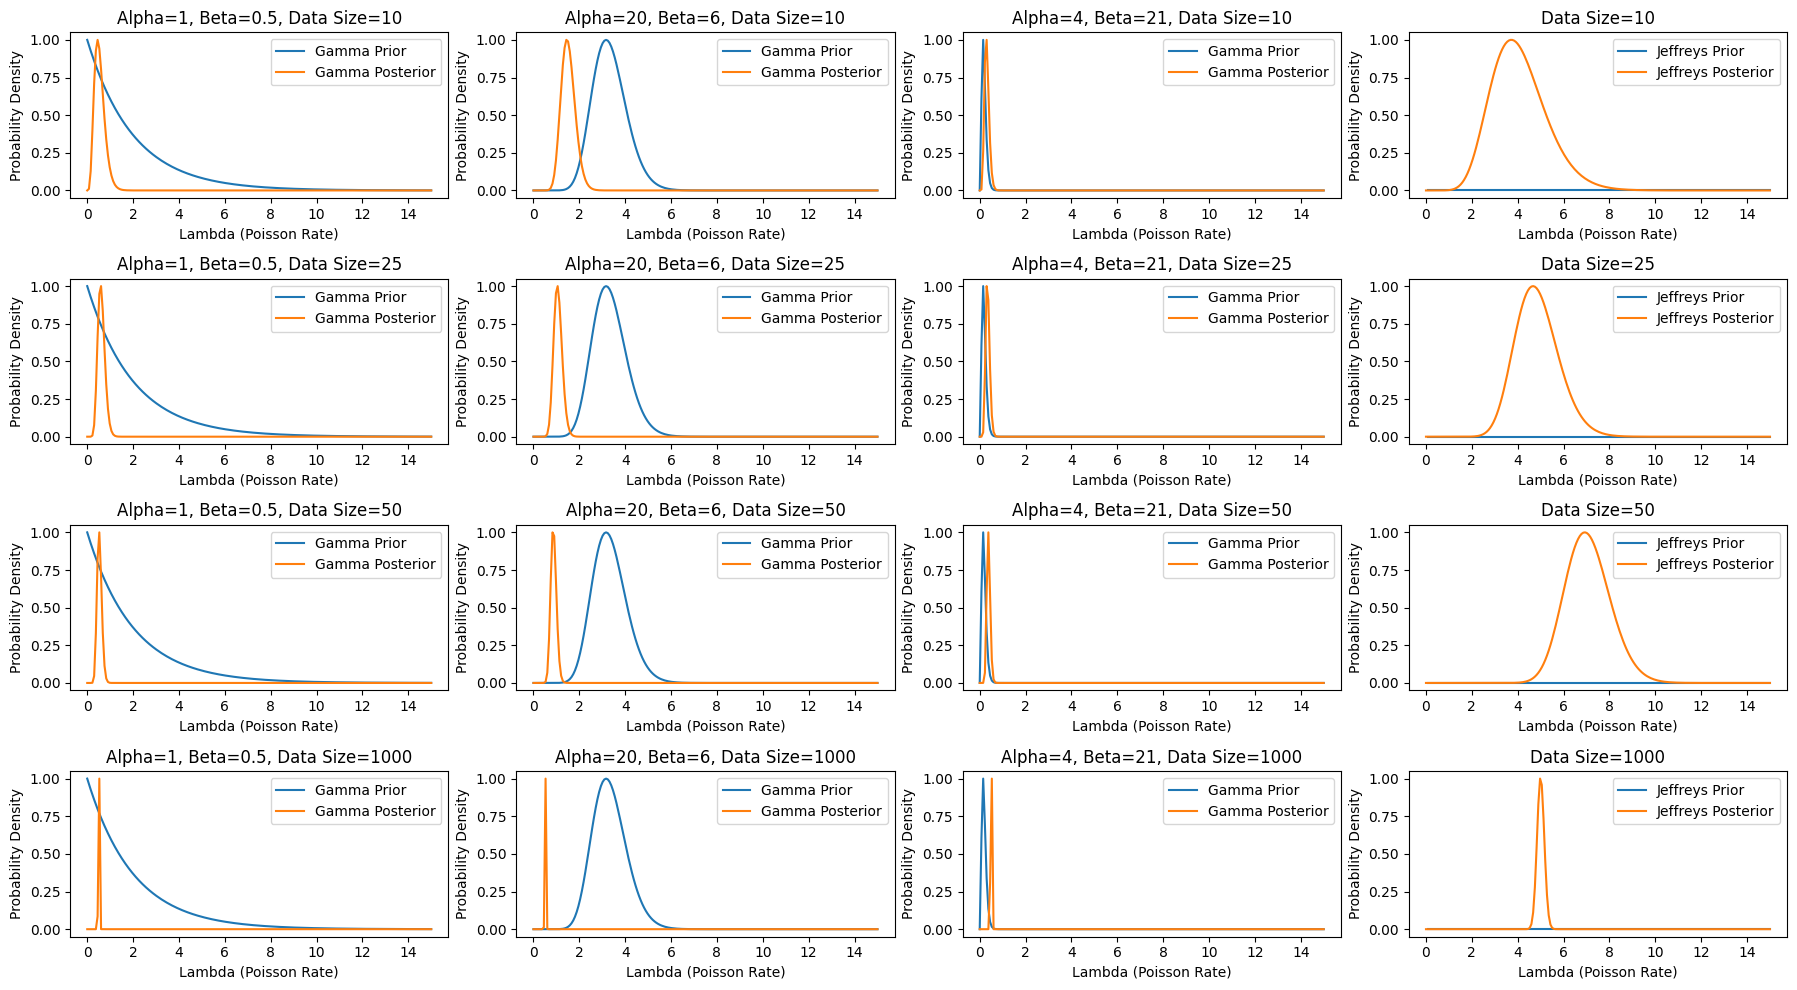

In [241]:
from scipy.stats import gamma, expon

# Parameters to explore
alpha_values = [1, 20, 4]
beta_values = [0.5, 6, 21]
data_sizes = [10, 25, 50, 1000]

# True Poisson rate (for simulation)
true_lambda = 2

# Range for plotting the distributions
lambda_range = np.linspace(0, 15, 200)

# Figure and subplot setup
num_cols = len(alpha_values) + 1  # Account for Jeffreys prior column
fig, axes = plt.subplots(len(data_sizes), num_cols, figsize=(18, 10))  

# Nested loops for parameter combinations and data sizes
for i, data_size in enumerate(data_sizes):
    for j, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
        ax = axes[i, j]

        # Data Simulation
        data = np.random.exponential(scale=1/true_lambda, size=data_size)

        # Gamma Prior 
        prior_pdf = gamma.pdf(lambda_range, a=alpha, scale=1 / beta)
        prior_pdf /= prior_pdf.max()  
        ax.plot(lambda_range, prior_pdf, label='Gamma Prior')

        # Gamma Posterior 
        posterior_alpha = alpha + np.sum(data)
        posterior_beta = beta + data_size
        posterior_pdf = gamma.pdf(lambda_range, a=posterior_alpha, scale=1 / posterior_beta)
        posterior_pdf /= posterior_pdf.max() 
        ax.plot(lambda_range, posterior_pdf, label='Gamma Posterior')

        ax.set_xlabel('Lambda (Poisson Rate)')
        ax.set_ylabel('Probability Density')
        ax.set_title(f'Alpha={alpha}, Beta={beta}, Data Size={data_size}')
        ax.legend()

    # Scaling the data (if necessary)
    scaled_data = data / data.max() 

    # Jeffreys prior and posterior (last column)
    ax = axes[i, -1]  
    jeffreys_prior = 1/ np.sqrt(lambda_range)  
    jeffreys_prior /= jeffreys_prior.max() 
  
    ax.plot(lambda_range, jeffreys_prior, label='Jeffreys Prior')

    # Numerical calculation of posterior with Jeffreys prior
    lambda_range_tiled = np.tile(lambda_range, (data_size, 1))  # Create a copy for each data point
    log_likelihood = np.sum(np.log(np.maximum(lambda_range_tiled, 1e-10)) - lambda_range_tiled * scaled_data.reshape(-1, 1), axis=0) 
    likelihood = np.exp(log_likelihood)
    posterior_jeffreys = likelihood * np.sqrt(lambda_range) 

    if np.all(np.isfinite(posterior_jeffreys)) and np.any(posterior_jeffreys):  
        posterior_jeffreys /= posterior_jeffreys.max()  
    else:
        print("Warning: Posterior contains zero, NaN, or infinite values")

    ax.plot(lambda_range, posterior_jeffreys, label='Jeffreys Posterior') 
    ax.set_xlabel('Lambda (Poisson Rate)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Data Size={data_size}')  
    ax.legend()

plt.tight_layout()  
plt.show()